In [2]:
#!/usr/bin/env python
# xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx #
# xxxxxxxxxxxxxxxxxxx------------------PLOT LIMITING MAGNITUDE OF A TELESCOPE--------------------xxxxxxxxxxxxxxxxxxxx #
# xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx #

# ------------------------------------------------------------------------------------------------------------------- #
# Import Required Libraries
# ------------------------------------------------------------------------------------------------------------------- #
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

plt.style.use('bmh')
# ------------------------------------------------------------------------------------------------------------------- #


# ------------------------------------------------------------------------------------------------------------------- #
# Global Variables
# ------------------------------------------------------------------------------------------------------------------- #
bandNames = ['u','g','r','i','z']
skyBrightness = {'U':22.14, 'B':22.42, 'V':21.28, 'R':20.54, 'I':18.86,'u': 22.55, 'g': 21.8, 'r': 20.83,'i': 19.2, 'z': 18.56} #mag/arc-sec^2
extinction = {'U':0.36, 'B':0.21, 'V':0.12, 'R':0.09, 'I':0.05,'u': 1.4, 'g': 0.05, 'r': 0.19,'i': 0.38, 'z': 0.52} #mag/airmass
filterCenter = {'U':3649.17, 'B':4373.15, 'V':5430.07, 'R':6495.43, 'I':8045.56,'u':3565.05,'g':4700.33,'r':6174.48,'i':7533.63,'z':8781.69} #Angstrom
fwhm = {'U':560.32, 'B':1004.16, 'V':810.91, 'R':1671.25, 'I':1522.50,'u':582.28,'g':1262.68,'r':1149.52,'i':1238.95,'z':994.39} #Angstrom
# ------------------------------------------------------------------------------------------------------------------- #


In [ ]:
def extcorrmag(mag, ext):
    extcorrmag = mag + ext[band] * airmass()

In [12]:
def airmass (angle = 0.0, alt = 0.0, deg = True): 
    ''' Returns path length through atmosphere i.e airmass in km 
    angle represents zenith angle
    angle MUST BE IN RADIANS, alt : altitude in km above MSL of obervatory
    deg is a boolean indicating whether the angle is in degrees or radians. True if it is in degrees
    Model: homogeneous spherical atmosphere'''
    if (deg):
        angle = math.radians(angle)
    s = 0.0 #path length
    R = 6371.0 #km
    altAtm = 100.0 #km - Karman Line - height of atmosphere
    s = math.sqrt(sqr(R+alt)*sqr(math.cos(angle)) + 2*R*(altAtm - alt) + sqr(altAtm) - sqr(alt)) - (R + alt)*math.cos(angle)
    return s, altAtm, s/(altAtm) #Normalised to 1 at zenith.

In [13]:
import math
def sqr (num):
    return math.pow(num, 2)
airmass(0, 5000)


(-4900.0, 100.0, -49.0)

In [ ]:
#!/usr/bin/env python
# xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx #
# xxxxxxxxxxxxxxxxxxx------------------PLOT LIMITING MAGNITUDE OF A TELESCOPE--------------------xxxxxxxxxxxxxxxxxxxx #
# xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx #

# ------------------------------------------------------------------------------------------------------------------- #
# Import Required Libraries
# ------------------------------------------------------------------------------------------------------------------- #
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

plt.style.use('bmh')
# ------------------------------------------------------------------------------------------------------------------- #


# ------------------------------------------------------------------------------------------------------------------- #
# Global Variables
# ------------------------------------------------------------------------------------------------------------------- #
data_file = 'LimMag_ILMT.dat'
dict_band = {1: ['g', 'seagreen', 'o'], 2: ['r', 'red', '^'], 3: ['i', 'orange', 'D']}
cols = ['EXPTIME', 'FILTER', 'MAG', 'SIGMA', 'NOISE', 'SNR', 'MAGERR']
# ------------------------------------------------------------------------------------------------------------------- #


# ------------------------------------------------------------------------------------------------------------------- #
# Function For Setting Plot Parameters
# ------------------------------------------------------------------------------------------------------------------- #

def set_plotparams(ax_obj, xticks=(1, 0.1), grid=True, fs=16, ms=1.5):
    """
    Sets plot parameters to the axes object 'ax_obj'.
    Args:
        ax_obj      : Axes object to be used for plotting and setting plot parameters
        xticks      : X-Axis Major and Minor tick intervals
        grid        : Boolean stating whether to enable Grid in the plot
        fs          : Fontsize of the labels
    Returns:
    """
    if grid:
        ax_obj.grid(True, which='major', ls='--', lw=1)

    ax_obj.xaxis.set_ticks_position('both')
    ax_obj.yaxis.set_ticks_position('both')
    ax_obj.xaxis.set_major_locator(MultipleLocator(xticks[0]))
    ax_obj.xaxis.set_minor_locator(MultipleLocator(xticks[1]))
    ax_obj.tick_params(axis='both', which='major', direction='in', width=1.6, length=9, color='k',
                       labelcolor='k', labelsize=fs)
    ax_obj.tick_params(axis='both', which='minor', direction='in', width=1.0, length=5, color='k',
                       labelcolor='k', labelsize=fs)

# ------------------------------------------------------------------------------------------------------------------- #


# ------------------------------------------------------------------------------------------------------------------- #
# Read the Limiting Magnitude Data File
# ------------------------------------------------------------------------------------------------------------------- #
data_df = pd.read_csv(data_file, sep='\s+', names=cols, comment='#')
lowexp_df = data_df[data_df['EXPTIME'] == 102.0]
highexp_df = data_df[data_df['EXPTIME'] == 306.0]

range_df = highexp_df.copy()
range_df['MAGERRLOW'] = lowexp_df['MAGERR'].values
range_df['SNRLOW'] = lowexp_df['SNR'].values
# ------------------------------------------------------------------------------------------------------------------- #

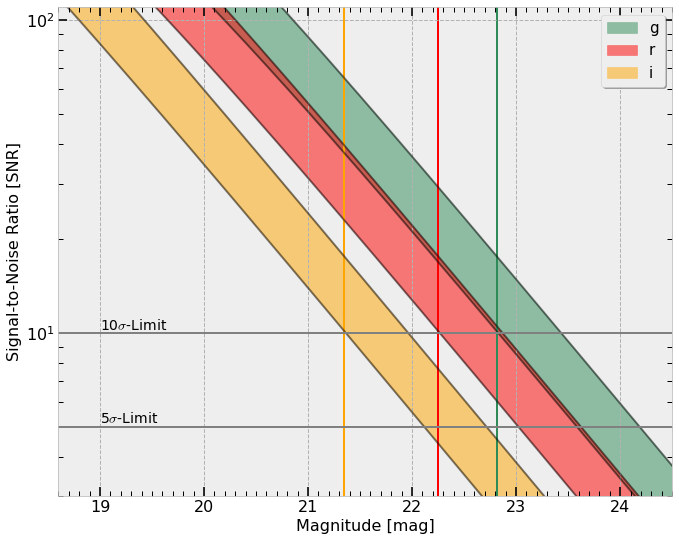

In [5]:
# ------------------------------------------------------------------------------------------------------------------- #
# Plot Limiting Magnitude as a Function of SNR
# ------------------------------------------------------------------------------------------------------------------- #
fig = plt.figure(figsize=(11, 9))
ax = fig.add_subplot(111)

# for band, band_df in lowexp_df.groupby('FILTER'):
#     ax.semilogy(band_df['MAG'], band_df['SNR'], c=dict_band[band][1], ls='', lw=1,
#                 marker=dict_band[band][2], ms=10, label=dict_band[band][0])
# for band, band_df in highexp_df.groupby('FILTER'):
#     ax.semilogy(band_df['MAG'], band_df['SNR'], c=dict_band[band][1], marker='', ls='-', lw=4,
#                 ms=10, label=None)

for band, band_df in range_df.groupby('FILTER'):
    ax.fill_between(band_df['MAG'], y1=band_df['SNRLOW'], y2=band_df['SNR'],
                    color=dict_band[band][1], alpha=0.5, label=dict_band[band][0])
    ax.plot(band_df['MAG'], band_df['SNRLOW'], color='k', ls='-', lw=2, alpha=0.5)
    ax.plot(band_df['MAG'], band_df['SNR'], color='k', ls='-', lw=2, alpha=0.5)

ax.axhline(10, ls='-', lw=2, color='grey')
ax.axhline(5, ls='-', lw=2, color='grey')
ax.axvline(22.82, ls='-', lw=2, color='seagreen', zorder=1)
ax.axvline(22.25, ls='-', lw=2, color='r', zorder=1)
ax.axvline(21.35, ls='-', lw=2, color='orange', zorder=1)
ax.text(19, 5.15, r'5$\rm \sigma$-Limit', color='k', fontsize=14)
ax.text(19, 10.2, r'10$\rm \sigma$-Limit', color='k', fontsize=14)

ax.set_ylim(3, 110)
ax.set_xlim(18.6, 24.5)

set_plotparams(ax)
ax.yaxis.set_major_locator(MultipleLocator(10))
ax.yaxis.set_minor_locator(MultipleLocator(11))
ax.set_yscale('log')
ax.legend(fontsize=15, markerscale=1.5, fancybox=True, shadow=True)
ax.set_ylabel('Signal-to-Noise Ratio [SNR]', fontsize=16)
ax.set_xlabel('Magnitude [mag]', fontsize=16)

fig.savefig('PLOT_LimMagVsSNR.pdf', format='pdf', dpi=2000, bbox_inches='tight')
plt.show()
# ------------------------------------------------------------------------------------------------------------------- #

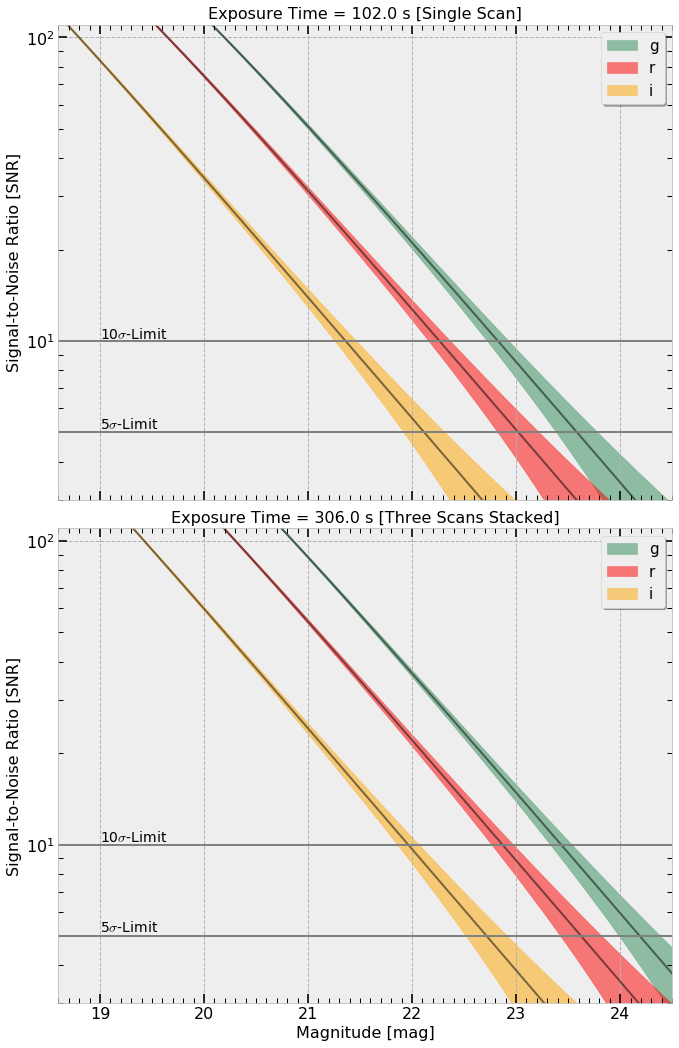

In [3]:
# ------------------------------------------------------------------------------------------------------------------- #
# Plot Limiting Magnitude as a Function of SNR [Errors Specified]
# ------------------------------------------------------------------------------------------------------------------- #
fig2, ax2 = plt.subplots(2, 1, figsize=(11, 18), sharex=True)

for band, band_df in lowexp_df.groupby('FILTER'):
    ax2[0].fill_betweenx(band_df['SNR'], x1=band_df['MAG'] - band_df['MAGERR'],
                     x2=band_df['MAG'] + band_df['MAGERR'],
                    color=dict_band[band][1], alpha=0.5, label=dict_band[band][0])

    ax2[0].plot(band_df['MAG'], band_df['SNR'], color='k', ls='-', lw=2, alpha=0.5)
#     ax2[0].plot(band_df['MAG'] - band_df['MAGERR'], band_df['SNR'], color='k', ls='--', lw=1, alpha=0.5)
#     ax2[0].plot(band_df['MAG'] + band_df['MAGERR'], band_df['SNR'], color='k', ls='--', lw=1, alpha=0.5)
    
ax2[0].axhline(10, ls='-', lw=2, color='grey')
ax2[0].axhline(5, ls='-', lw=2, color='grey')
ax2[0].text(19, 5.15, r'5$\rm \sigma$-Limit', color='k', fontsize=14)
ax2[0].text(19, 10.2, r'10$\rm \sigma$-Limit', color='k', fontsize=14)

ax2[0].set_ylim(3, 110)
ax2[0].set_xlim(18.6, 24.5)

set_plotparams(ax2[0])
ax2[0].set_yscale('log')
ax2[0].legend(fontsize=15, markerscale=1.5, fancybox=True, shadow=True)
ax2[0].set_ylabel('Signal-to-Noise Ratio [SNR]', fontsize=16)
ax2[0].set_title('Exposure Time = {0:.1f} s [Single Scan]'.format(lowexp_df['EXPTIME'].values[0]), fontsize=16)

for band, band_df in highexp_df.groupby('FILTER'):
    ax2[1].fill_betweenx(band_df['SNR'], x1=band_df['MAG'] - band_df['MAGERR'],
                     x2=band_df['MAG'] + band_df['MAGERR'],
                    color=dict_band[band][1], alpha=0.5, label=dict_band[band][0])

    ax2[1].plot(band_df['MAG'], band_df['SNR'], color='k', ls='-', lw=2, alpha=0.5)
#     ax2[1].plot(band_df['MAG'] - band_df['MAGERR'], band_df['SNR'], color='k', ls='--', lw=1, alpha=0.5)
#     ax2[1].plot(band_df['MAG'] + band_df['MAGERR'], band_df['SNR'], color='k', ls='--', lw=1, alpha=0.5)

ax2[1].axhline(10, ls='-', lw=2, color='grey')
ax2[1].axhline(5, ls='-', lw=2, color='grey')
ax2[1].text(19, 5.15, r'5$\rm \sigma$-Limit', color='k', fontsize=14)
ax2[1].text(19, 10.2, r'10$\rm \sigma$-Limit', color='k', fontsize=14)

ax2[1].set_ylim(3, 110)

set_plotparams(ax2[1])
ax2[1].set_yscale('log')
ax2[1].legend(fontsize=15, markerscale=1.5, fancybox=True, shadow=True)
ax2[1].set_xlabel('Magnitude [mag]', fontsize=16)
ax2[1].set_ylabel('Signal-to-Noise Ratio [SNR]', fontsize=16)
ax2[1].set_title('Exposure Time = {0:.1f} s [Three Scans Stacked]'.format(highexp_df['EXPTIME'].values[0]), fontsize=16)

fig2.subplots_adjust(hspace=0.06)
fig2.savefig('PLOT_LimMagErr.pdf', format='pdf', dpi=2000, bbox_inches='tight')
plt.show()

In [4]:
# lowexp_df['flux'] = lowexp_df['MAG'].apply(lambda x: 10 ** (-0.4 * x))
# lowexp_df['temp'] = (lowexp_df['MAG'] + lowexp_df['MAGERR']).apply(lambda x: 10 ** (-0.4 * x))
# lowexp_df['fluxerr'] = lowexp_df['flux'] - lowexp_df['temp']
# lowexp_df['snr'] = lowexp_df['flux'] / lowexp_df['fluxerr']
# lowexp_df['mult'] = lowexp_df['SNR'] * lowexp_df['MAGERR']
# lowexp_df[['SNR', 'snr', 'MAGERR', 'mult']][lowexp_df['SNR'] > 1]

In [5]:
# fig = plt.figure(figsize=(12, 9))
# ax = fig.add_subplot(111)

# for band, band_df in lowexp_df.groupby('FILTER'):
#     ax.fill_betweenx(band_df['SNR'], x1=band_df['MAG'] - band_df['MAGERR'],
#                      x2=band_df['MAG'] + band_df['MAGERR'],
#                     color=dict_band[band][1], alpha=0.5, label=dict_band[band][0])

#     ax.plot(band_df['MAG'], band_df['SNR'], color='k', ls='-', lw=2, alpha=0.5)
# #     ax.plot(band_df['MAG'] - band_df['MAGERR'], band_df['SNR'], color='k', ls='--', lw=1, alpha=0.5)
# #     ax.plot(band_df['MAG'] + band_df['MAGERR'], band_df['SNR'], color='k', ls='--', lw=1, alpha=0.5)
    
# ax.legend(fontsize=15, markerscale=1.5, fancybox=True, shadow=True)

# ax.axhline(10, ls='-', lw=2, color='grey')
# ax.axhline(5, ls='-', lw=2, color='grey')
# ax.text(19, 5.15, r'5$\rm \sigma$-Limit', color='k', fontsize=14)
# ax.text(19, 10.2, r'10$\rm \sigma$-Limit', color='k', fontsize=14)

# ax.set_yscale('log')
# ax.grid('True', ls='--', lw=1)
# ax.xaxis.set_ticks_position('both')
# ax.yaxis.set_ticks_position('both')
# ax.xaxis.set_major_locator(MultipleLocator(1))
# ax.xaxis.set_minor_locator(MultipleLocator(0.1))
# ax.tick_params(axis='both', which='major', direction='in', width=1.6, length=9, labelsize=16)
# ax.tick_params(axis='both', which='minor', direction='in', width=0.9, length=5, labelsize=16)

# ax.set_ylim(2, 110)
# ax.set_xlim(18.4, 25)
# ax.set_ylabel('Signal-to-Noise Ratio [SNR]', fontsize=16)
# ax.set_xlabel('Limiting Magnitude [mag]', fontsize=16)
# ax.set_title('Exposure Time = {0:.1f} s'.format(lowexp_df['EXPTIME'].values[0]), fontsize=16)

# fig.savefig('PLOT_MagVsSNRV2.pdf', format='pdf', dpi=2000, bbox_inches='tight')
# plt.show()

# fig = plt.figure(figsize=(12, 9))
# ax = fig.add_subplot(111)

# for band, band_df in highexp_df.groupby('FILTER'):
#     ax.fill_betweenx(band_df['SNR'], x1=band_df['MAG'] - band_df['MAGERR'],
#                      x2=band_df['MAG'] + band_df['MAGERR'],
#                     color=dict_band[band][1], alpha=0.5, label=dict_band[band][0])

#     ax.plot(band_df['MAG'], band_df['SNR'], color='k', ls='-', lw=2, alpha=0.5)
# #     ax.plot(band_df['MAG'] - band_df['MAGERR'], band_df['SNR'], color='k', ls='--', lw=1, alpha=0.5)
# #     ax.plot(band_df['MAG'] + band_df['MAGERR'], band_df['SNR'], color='k', ls='--', lw=1, alpha=0.5)
    
# ax.legend(fontsize=15, markerscale=1.5, fancybox=True, shadow=True)

# ax.axhline(10, ls='-', lw=2, color='grey')
# ax.axhline(5, ls='-', lw=2, color='grey')
# ax.text(19, 5.15, r'5$\rm \sigma$-Limit', color='k', fontsize=14)
# ax.text(19, 10.2, r'10$\rm \sigma$-Limit', color='k', fontsize=14)

# ax.set_yscale('log')
# ax.grid('True', ls='--', lw=1)
# ax.xaxis.set_ticks_position('both')
# ax.yaxis.set_ticks_position('both')
# ax.xaxis.set_major_locator(MultipleLocator(1))
# ax.xaxis.set_minor_locator(MultipleLocator(0.1))
# ax.tick_params(axis='both', which='major', direction='in', width=1.6, length=9, labelsize=16)
# ax.tick_params(axis='both', which='minor', direction='in', width=0.9, length=5, labelsize=16)

# ax.set_ylim(2, 110)
# ax.set_xlim(18.9, 25)
# ax.set_ylabel('Signal-to-Noise Ratio [SNR]', fontsize=16)
# ax.set_xlabel('Limiting Magnitude [mag]', fontsize=16)
# ax.set_title('Exposure Time = {0:.1f} s'.format(highexp_df['EXPTIME'].values[0]), fontsize=16)

# fig.savefig('PLOT_MagVsSNRV3.pdf', format='pdf', dpi=2000, bbox_inches='tight')
# plt.show()